In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

### Yearly Analysis and Covid Impact

In [68]:
file_path = 'results/yearly_counts/yearly_counts_analysis.csv'
yearly_counts = pd.read_csv(file_path)
print(df.head())

   year state  accident_count
0  2017    AL            2904
1  2018    AL           14100
2  2019    AL           19238
3  2020    AL           20185
4  2021    AL           23510


In [69]:
yearly_totals = df.groupby('year')['accident_count'].sum().reset_index()

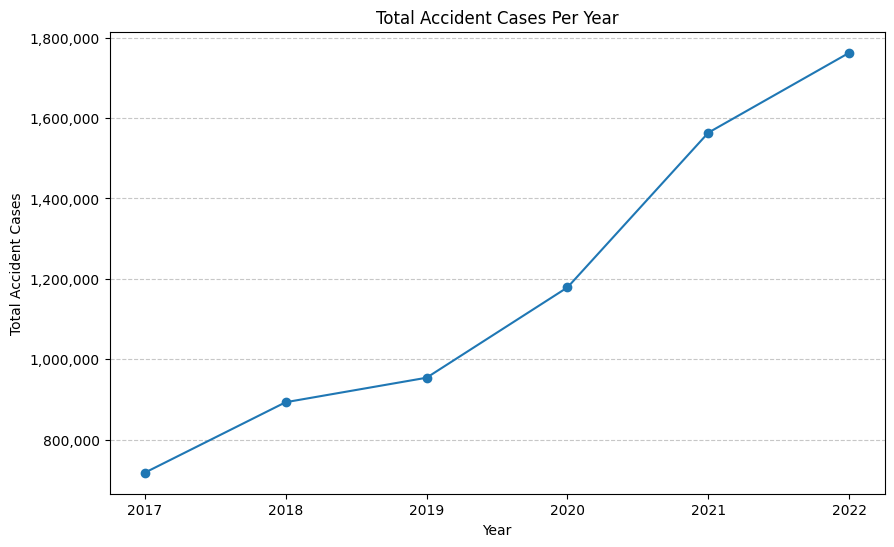

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['year'], yearly_totals['accident_count'], marker='o', linestyle='-')

plt.title('Total Accident Cases Per Year')
plt.xlabel('Year')
plt.ylabel('Total Accident Cases')

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [71]:
def plot_percentage_change(data, year_start, year_end):
    df_filtered = data[data['year'].isin([year_start, year_end])]
    
    pivoted = df_filtered.pivot(index='state', columns='year', values='accident_count').reset_index()
    pivoted.columns = ['State', f'{year_start}', f'{year_end}']
    pivoted['percent_change'] = ((pivoted[f'{year_end}'] - pivoted[f'{year_start}']) / pivoted[f'{year_start}']) * 100
    pivoted = pivoted.sort_values(by='percent_change', ascending=False)
    
    plt.figure(figsize=(12, 8))
    colors = pivoted['percent_change'].apply(lambda x: 'green' if x > 0 else 'red')
    
    plt.bar(pivoted['State'], pivoted['percent_change'], color=colors)
    
    plt.title(f'Percentage Change in Accidents ({year_start} to {year_end}) by State')
    plt.xlabel('State')
    plt.ylabel('Percentage Change (%)')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.xticks(rotation=45)
    plt.show()

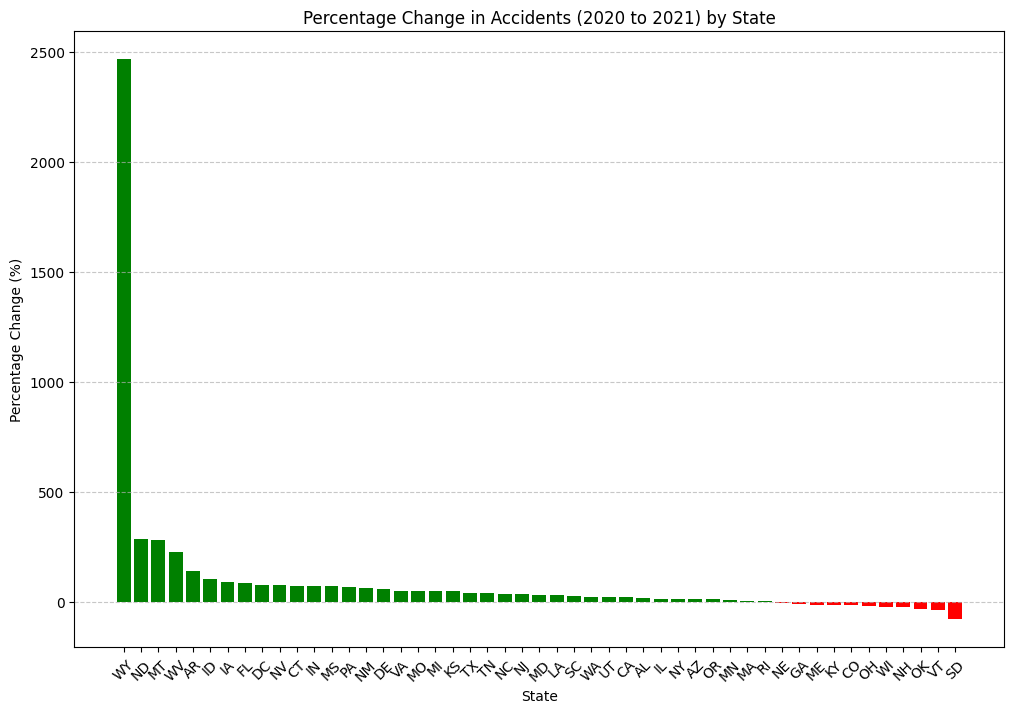

In [72]:
plot_percentage_change(yearly_counts, 2020, 2021)

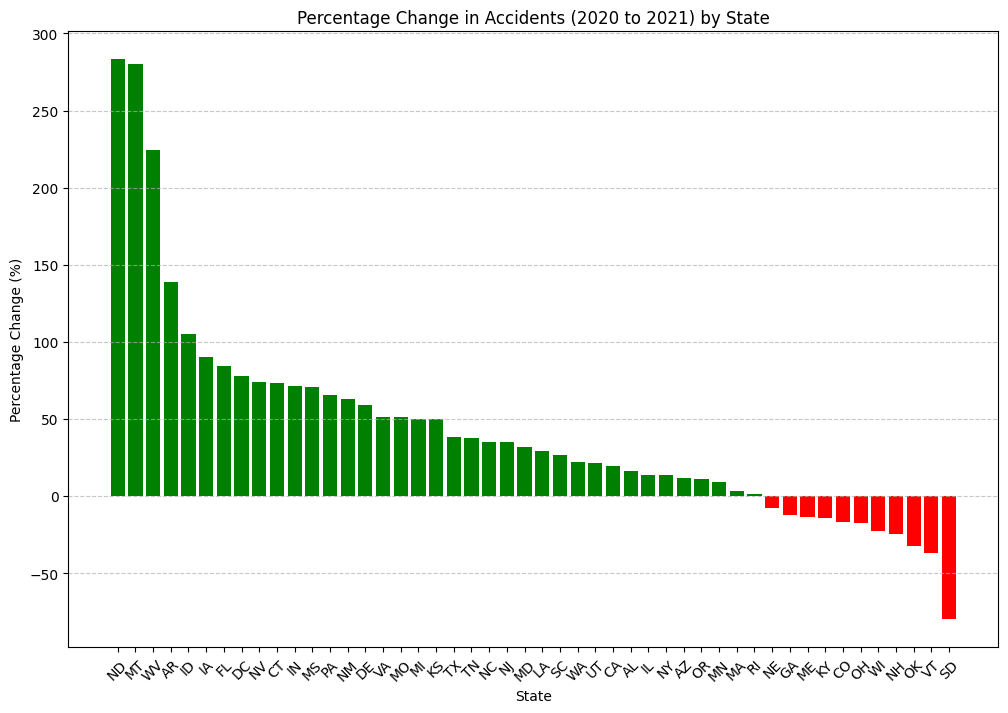

In [73]:
yearly_counts_filtered = yearly_counts[yearly_counts['state'] != 'WY']
plot_percentage_change(yearly_counts_filtered, 2020, 2021)

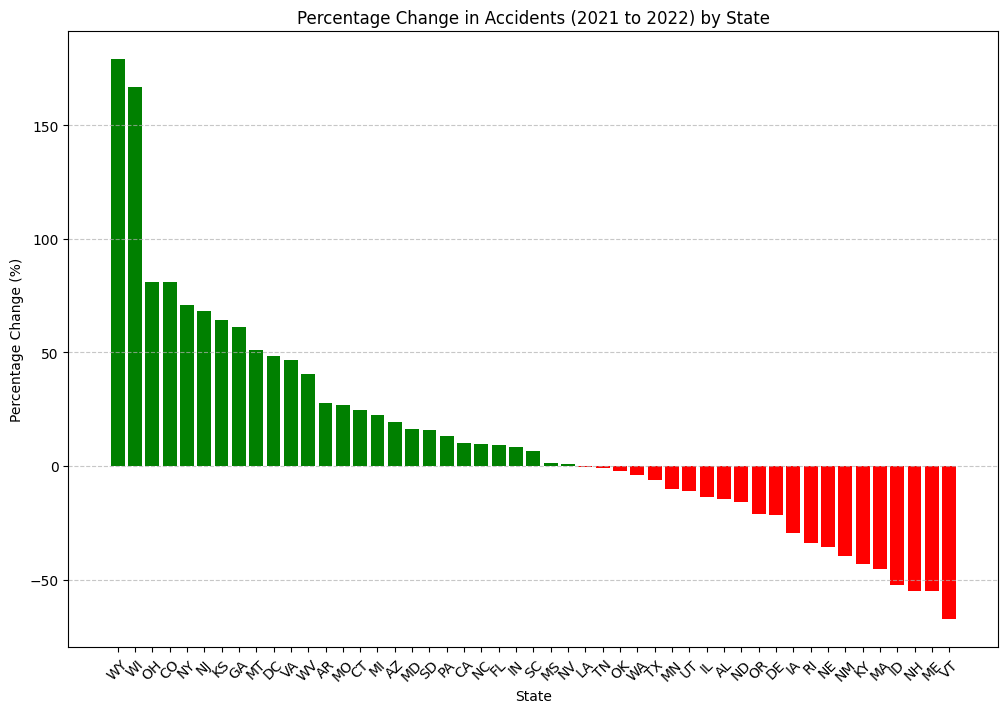

In [74]:
plot_percentage_change(yearly_counts, 2021, 2022)

### Severity Analysis

In [75]:
file_path_severity = 'results/severity_patterns_states/severity_patterns_states_analysis.csv'

In [76]:
severity_states = pd.read_csv(file_path_severity)
print(severity_states.head())

  state  total_accidents  severe_accidents  avg_severity_score  \
0    RI            15513              7223                2.46   
1    GA           147528             65174                2.51   
2    KY            31112             13298                2.45   
3    WI            31080             12520                2.50   
4    IL           147438             57256                2.40   

   severe_accident_percentage  
0                       46.56  
1                       44.18  
2                       42.74  
3                       40.28  
4                       38.83  


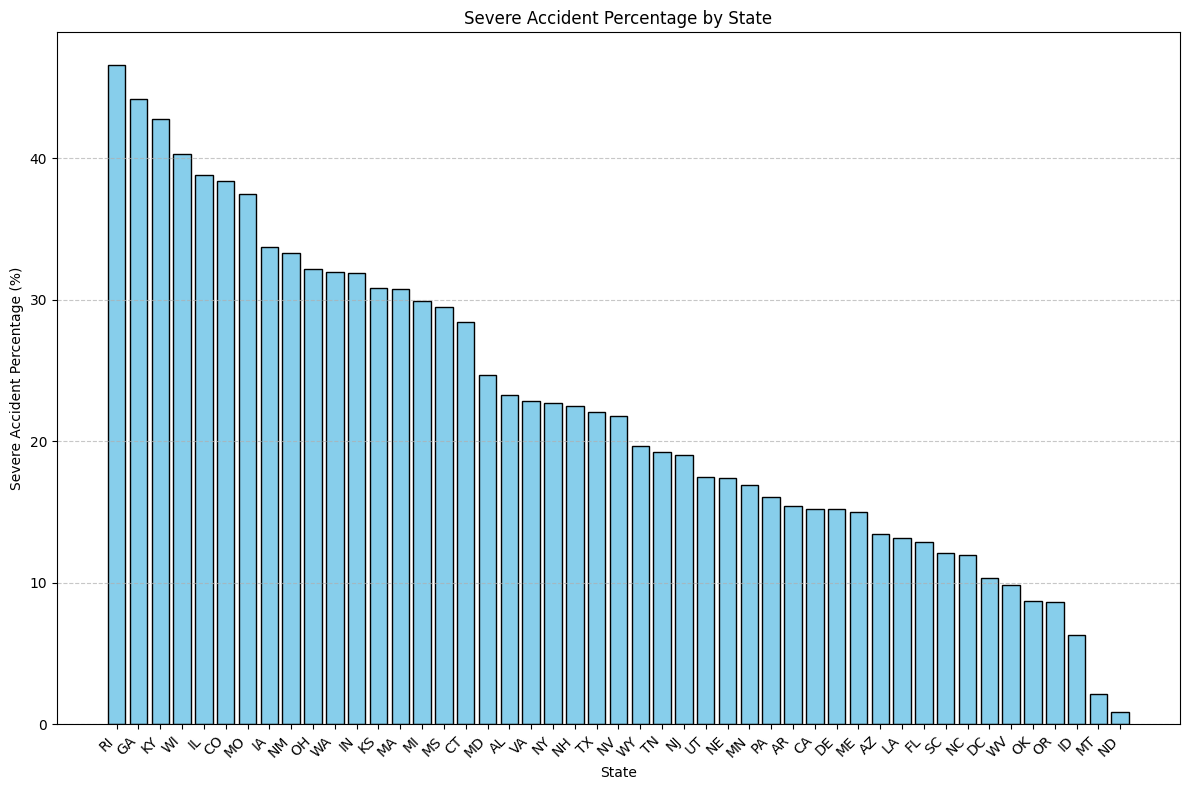

In [85]:
plt.figure(figsize=(12, 8))
bars = plt.bar(severity_states['state'], severity_states['severe_accident_percentage'], color='skyblue', edgecolor='black')

plt.title('Severe Accident Percentage by State')
plt.xlabel('State')
plt.ylabel('Severe Accident Percentage (%)')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [87]:
fig = px.choropleth(
    severity_states,
    locations="state",
    locationmode="USA-states",
    color="severe_accident_percentage",
    color_continuous_scale="Reds",
    scope="usa",
    labels={"severe_accident_percentage": "Severe Accident (%)"},
    title="Severe Accident Percentage by State"
)

fig.update_layout(
    title_x=0.5,
    geo=dict(showframe=False, showcoastlines=False)
)
fig.show()